In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [32]:
def dist_from_query(query):
    def distance(p1):
        return np.sum((p1 - query) ** 2)

    return distance


def simple_search(data, query, k):
    sorted_data = sorted(data, key=dist_from_query(query))
    return np.array(sorted_data[:k])

# $k$-NNS

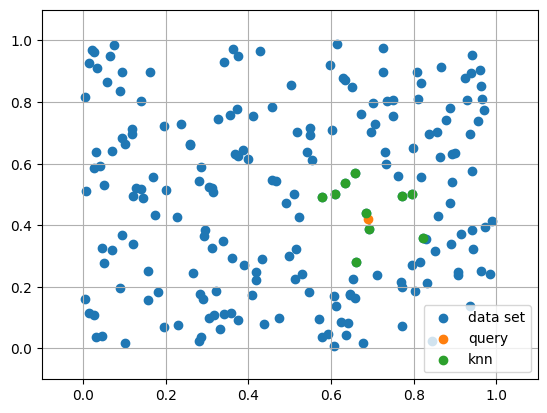

In [33]:
xs = np.random.random(size=(200, 2))
q = np.array([0.69, 0.420])
knn = simple_search(xs, q, 10)

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="query")
plt.scatter(knn[:, 0], knn[:, 1], label="knn")
plt.legend()

plt.savefig("sim-search-final", bbox_inches="tight")

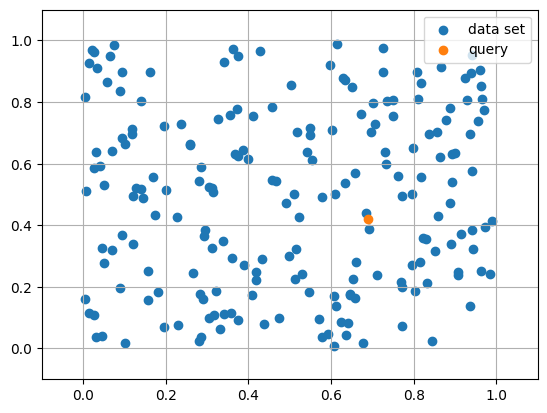

In [34]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="query")
plt.legend()

plt.savefig("sim-search-init", bbox_inches="tight")

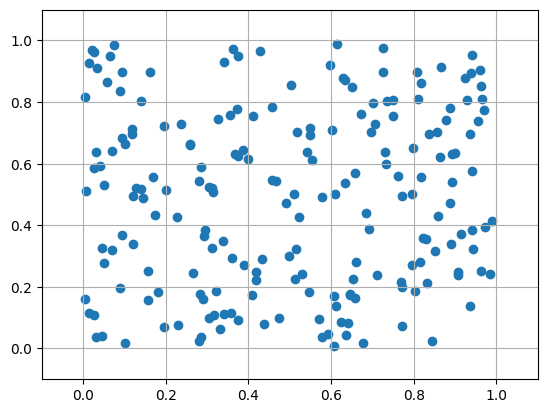

In [35]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter(xs[:, 0], xs[:, 1], label="data set")

plt.savefig("sim-search-P", bbox_inches="tight")

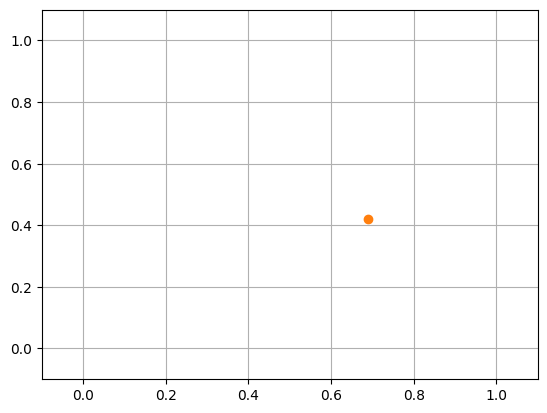

In [36]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter([], [])
plt.scatter(q[0], q[1], label="data set")

plt.savefig("sim-search-q", bbox_inches="tight")

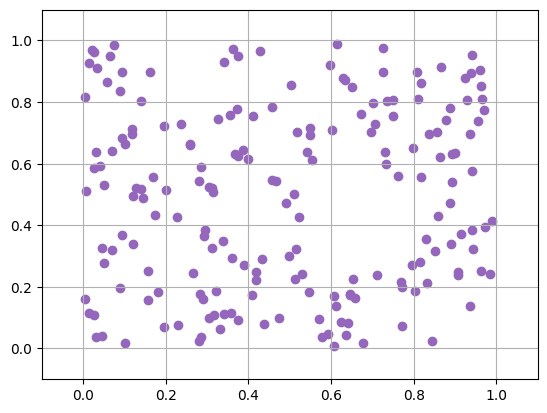

In [37]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter([], [])
plt.scatter([], [])
plt.scatter([], [])
plt.scatter([], [])
xs_without = simple_search(xs, q, 200)[::-1][:190]
plt.scatter(xs_without[:, 0], xs_without[:, 1], label="data set")

plt.savefig("sim-search-Pminus", bbox_inches="tight")

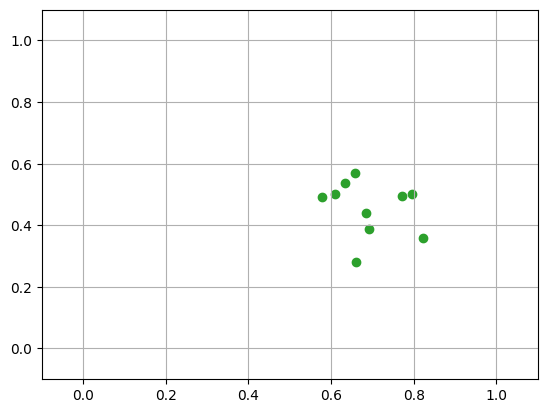

In [38]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter([], [])
plt.scatter([], [])
plt.scatter(knn[:, 0], knn[:, 1], label="data set")

plt.savefig("sim-search-knn", bbox_inches="tight")

# Distance Experiments

In [39]:
for d in range(1, 10):
    xsd = np.random.random(size=(200, d))
    dists = []
    for i in range(200):
        dist = dist_from_query(xsd[i])
        for j in range(i, 200):
            dists.append(dist(xsd[j]))
    print(f"d = {d}: {np.mean(dists)}")

d = 1: 0.18699801284889547
d = 2: 0.30679732183021796
d = 3: 0.5158120476031265
d = 4: 0.6561029997461288
d = 5: 0.8210507783945058
d = 6: 0.9750502347388202
d = 7: 1.164597147839554
d = 8: 1.304448715784736
d = 9: 1.4283211661544946


# Search Visualizer

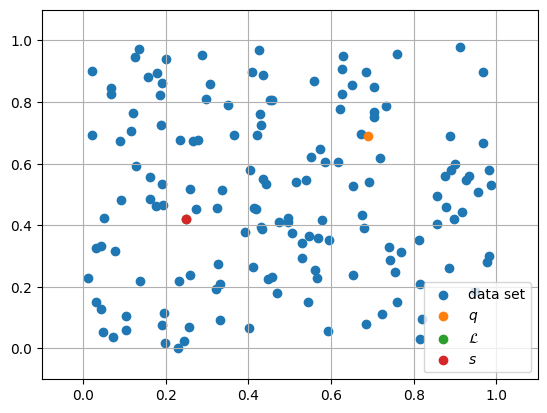

In [40]:
np.random.seed(69)
k = 20

xs = np.random.random(size=(150, 2))
s = [0.25, 0.42]
q = [0.69, 0.69]
L = np.array([s])

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="$q$")
plt.scatter(L[:, 0], L[:, 1], label="$\\mathcal{L}$")
plt.scatter(s[0], s[1], label="$s$")
plt.legend()

plt.savefig("greedy-search-begin", bbox_inches="tight")

(20, 2)

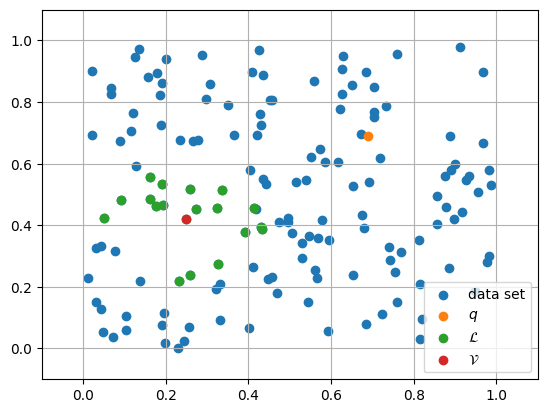

In [41]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

L = np.append(L, simple_search(xs, s, k), 0)
V = np.array([s])
L = np.array(sorted(L, key=dist_from_query(q))[:k])
s = L[0]

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="$q$")
plt.scatter(L[1:, 0], L[1:, 1], label="$\\mathcal{L}$")
plt.scatter(V[:, 0], V[:, 1], label="$\\mathcal{V}$")
plt.legend()

plt.savefig("greedy-search-1", bbox_inches="tight")
L.shape

(20, 2)

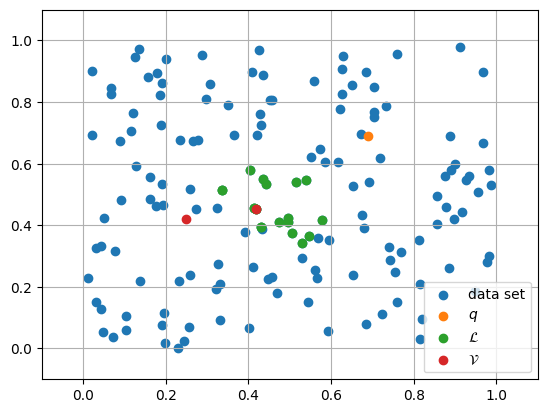

In [42]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

L = np.append(L, simple_search(xs, s, k), 0)
V = np.append(V, [s], 0)
L = np.array(sorted(L, key=dist_from_query(q))[:k])
s = L[0]

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="$q$")
plt.scatter(L[:, 0], L[:, 1], label="$\\mathcal{L}$")
plt.scatter(V[:, 0], V[:, 1], label="$\\mathcal{V}$")
plt.legend()

plt.savefig("greedy-search-2", bbox_inches="tight")
L.shape

(20, 2)

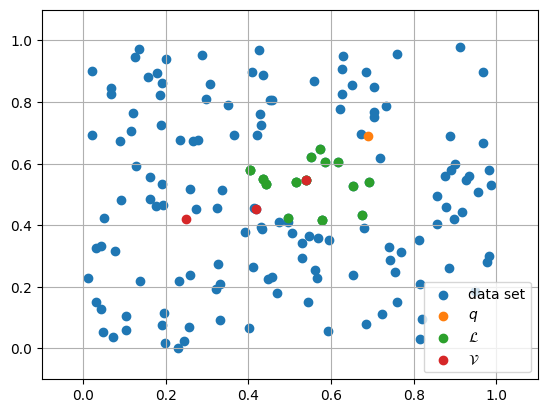

In [43]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

L = np.append(L, simple_search(xs, s, k), 0)
V = np.append(V, [s], 0)
L = np.array(sorted(L, key=dist_from_query(q))[:k])
s = L[0]

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="$q$")
plt.scatter(L[:, 0], L[:, 1], label="$\\mathcal{L}$")
plt.scatter(V[:, 0], V[:, 1], label="$\\mathcal{V}$")
plt.legend()

plt.savefig("greedy-search-3", bbox_inches="tight")
L.shape

(20, 2)

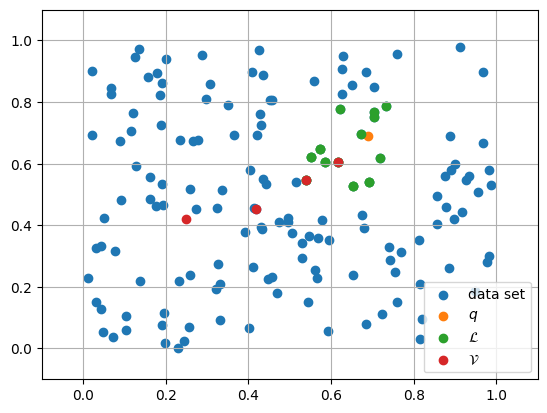

In [44]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

L = np.append(L, simple_search(xs, s, k), 0)
V = np.append(V, [s], 0)
L = np.array(sorted(L, key=dist_from_query(q))[:k])
s = L[0]

plt.scatter(xs[:, 0], xs[:, 1], label="data set")
plt.scatter(q[0], q[1], label="$q$")
plt.scatter(L[:, 0], L[:, 1], label="$\\mathcal{L}$")
plt.scatter(V[:, 0], V[:, 1], label="$\\mathcal{V}$")
plt.legend()

plt.savefig("greedy-search-4", bbox_inches="tight")
L.shape

(20, 2)

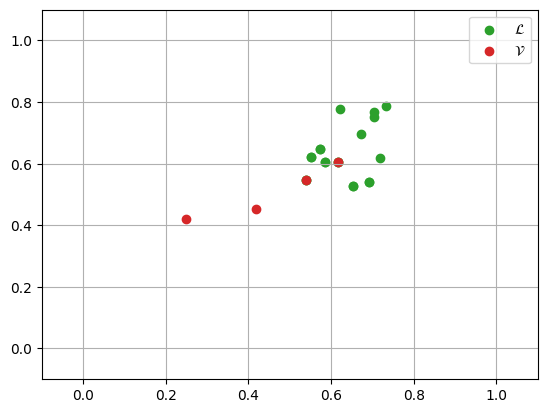

In [46]:
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.grid()

# plt.scatter(xs[:, 0], xs[:, 1], label="data set")
# plt.scatter(q[0], q[1], label="$q$")
plt.scatter([], [])
plt.scatter([], [])
plt.scatter(L[:k, 0], L[:k, 1], label="$\\mathcal{L}$")
plt.scatter(V[:, 0], V[:, 1], label="$\\mathcal{V}$")
plt.legend()

plt.savefig("greedy-search-final", bbox_inches="tight")
L.shape